# Ridge (L2), Lasso (L1), and Elastic Net Regression on Boston Housing Dataset

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s




In [441]:
import numpy as np
import pandas as pd  
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV,ElasticNet,ElasticNetCV
import matplotlib.pyplot as plt 
%matplotlib inline

In [442]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [443]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

**Data preprocessing**

In [444]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [445]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [446]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [447]:
len(boston)

506

For the purposes of this demonostrating Regularization, lets suppose this is a weak sample of data of 70 observations. 

In [448]:
boston_ = boston.sample(n=70, random_state=42)

**Prepare the data for training**

In [449]:
X = boston_.drop('MEDV', axis=1)
y = boston_['MEDV']

**Split the data into training and testing sets**

In [450]:
#Standardizing - we standardize the values especially if we are to run penalized regression analysis
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Train the model using sklearn LinearRegression**

In [451]:
lin_reg = LinearRegression().fit(X_train, y_train)
train_score = lin_reg.score(X_train, y_train)
test_score = lin_reg.score(X_test, y_test)

print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.9000654193769959
test_score:0.4766420815450464


It is clear, the model was overfitted because the test data scored poorly. 

**Train the model using sklearn Ridge (L2) Regression**

To demonostrate visually, we use crossvalidation to tune the alpha parameters and pick the optimal alpha. 

In [452]:
alphas = 10**np.linspace(-2,4,100)

In [453]:
mean_rmse = []

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    rmse_list = np.sqrt(-cross_val_score(reg, X_train, y_train, scoring="neg_mean_squared_error", cv=3))
    mean_rmse.append(rmse_list.mean())

cv_ridge = pd.Series(mean_rmse, index=alphas)
optimal_alpha = cv_ridge.idxmin()

Optimal alpha from cross_val_score is 6.135907273413176


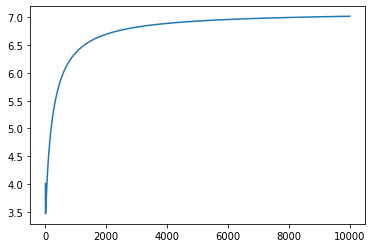

In [454]:
print('Optimal alpha from cross_val_score is {}'.format(optimal_alpha)),
plt.plot(cv_ridge)

Luckily, sklearn has a built in Ridge, Lasso and ElasticNet Cross Validation to streamline this process.

In [455]:
ridgecv = RidgeCV(alphas=alphas,cv=3).fit(X_train, y_train)
optimal_alpha =  ridgecv.alpha_
print('Optimal alpha (L2) from RidgeCV is {}'.format(optimal_alpha))

Optimal alpha (L2) from RidgeCV is 7.054802310718645


In [456]:
ridge_reg = Ridge(alpha=optimal_alpha).fit(X_train, y_train)
train_score = ridge_reg.score(X_train, y_train)
test_score = ridge_reg.score(X_test, y_test)

print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.8744577642260849
test_score:0.7906561757443474


**Train the model using sklearn Lasso (L1) Regression**

In [457]:
lassocv = LassoCV(alphas=alphas,cv=3).fit(X_train, y_train)
optimal_alpha =  lassocv.alpha_
print('Optimal alpha (L1) from LassoCV is {}'.format(optimal_alpha))

Optimal alpha (L1) from LassoCV is 0.14174741629268056


In [458]:
lasso_reg = Lasso(alpha=optimal_alpha).fit(X_train, y_train)
train_score = lasso_reg.score(X_train, y_train)
test_score = lasso_reg.score(X_test, y_test)

print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.8804179479615717
test_score:0.7373705249721474


Lasso does feature selection for you by setting the coefficient of the features it deems unimportant to zero. 

In [459]:
coef = pd.Series(lasso_reg.coef_, index=X.columns)
coef

CRIM      -2.231187
ZN         1.069069
INDUS     -0.791937
CHAS       0.632507
NOX       -0.406604
RM         3.494307
AGE       -1.758552
DIS       -1.268227
RAD        0.531136
TAX       -0.000000
PTRATIO   -1.997886
B          0.427779
LSTAT     -0.075868
dtype: float64

****Train the model using sklearn ElasticNet Regression**** - Linear regression with combined L1 and L2 priors as regularizer.

In [460]:
#For l1_ratio = 0 the penalty is an L2 penalty (Ridge). For l1_ratio = 1 it is an L1 penalty (Lasso).
#For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2

l1_ratios = np.arange(.001, 1, .02)

In [461]:
elasticnetcv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=3, n_jobs=-1).fit(X_train, y_train)
optimal_alpha, optimal_l1ratio =  elasticnetcv.alpha_, elasticnetcv.l1_ratio_
print('Optimal alpha is {}, Optimal L1 ratio is {}'.format(optimal_alpha,optimal_l1ratio))

Optimal alpha is 0.16297508346206444, Optimal L1 ratio is 0.001


In [462]:
elasticnet_reg = ElasticNet(alpha=optimal_alpha, l1_ratio=optimal_l1ratio).fit(X_train, y_train)
train_score = elasticnet_reg.score(X_train, y_train)
test_score = elasticnet_reg.score(X_test, y_test)

print('Train score:{}'.format(train_score))
print('Test score:{}'.format(test_score))

Train score:0.8682231006248292
Test score:0.8031964681362849


In [463]:
coef = pd.Series(elasticnet_reg.coef_, index=X.columns)
coef

CRIM      -1.308885
ZN         1.265123
INDUS     -0.569130
CHAS       0.637102
NOX       -0.626612
RM         2.528625
AGE       -1.145529
DIS       -1.111008
RAD        0.720890
TAX       -0.582014
PTRATIO   -1.714246
B          0.406139
LSTAT     -1.170245
dtype: float64

**Conclusion**

We used regularization to help generalize a smaller dataset of 70 observations. As expected, the test r2 score of a linear model is poor and significantly less than its training r2 score. We then proceed to test Ridge, Lasso, and ElasticNet Regression. The ElasticNet Regression is leaning toward Ridge Regression (ratio is near 0). ElasticNet Regression test r2 score is within 0.06 of the training score. A r2 of 0.803 is pretty good considering we are operating on 70 observations. 